Name: Itha Ram Sai Manoj
    
Roll No: E21007

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import os

**Importing the required functions**

In [3]:
# For test-train splitting
from sklearn.model_selection import train_test_split

#For fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

#from sklearn import tree
from sklearn import tree

# Classification

### Data

In [7]:
#Reading the file from the specified folder

os.chdir('C:\\Users\\Manoj\\IML')
iris = pd.read_csv('IRIS.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Seperating the Target and Predictors

In [8]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris[['species']]

### Train-Test Split(Stratified Sampling of Y)

In [9]:
# Stratify is to divide in homogenous

(X_Train, X_Test, y_Train, y_Test) = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 100)

In [10]:
(X_Train, X_valid, y_Train, y_valid) = train_test_split(X_Train, y_Train, test_size = 0.3, stratify = y_Train, random_state = 100)

In [11]:
y_Train.species.value_counts()/len(y_Train)

Iris-versicolor    0.342466
Iris-setosa        0.328767
Iris-virginica     0.328767
Name: species, dtype: float64

In [12]:
y_Test.species.value_counts()/len(y_Test)

Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: species, dtype: float64

### Decision Tree Classifier with criterion gini index

In [13]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_gini = clf_gini.fit(X_Train, y_Train)
#clf_gini

[Text(125.55000000000001, 190.26, 'X[2] <= 2.5\ngini = 0.667\nsamples = 73\nvalue = [24, 25, 24]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 24\nvalue = [24, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\ngini = 0.5\nsamples = 49\nvalue = [0, 25, 24]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 6.6\ngini = 0.08\nsamples = 24\nvalue = [0, 23, 1]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 19\nvalue = [0, 19, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 5.05\ngini = 0.147\nsamples = 25\nvalue = [0, 2, 23]'),
 Text(209.25, 27.180000000000007, 'gini = 0.408\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 18]')]

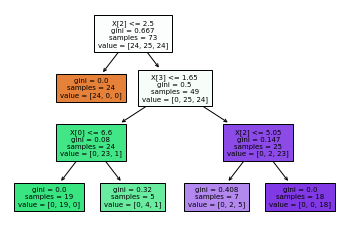

In [21]:
#Home Work:

#Figure out how to plot a decision tree algorithm in python

tree.plot_tree(clf_gini, filled = 'True', fontsize = 7)

In [ ]:
#Decision Tree

DecisionTree(class_weight = None, criterion = 'gini', max_depth = 3, max_features = None, max_leaf_nodes = None,
            min_samples_leaf = 5, min_samples_split = 2, min_weight_fraction_leaf = 0.0,
            )

### Classifying new Observations

In [12]:
#Making Predictions
y_pred = clf_gini.predict(X_Test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Regression Tree

In [23]:
cars = pd.read_csv('cars.csv')

In [24]:
X = cars[['Cylinders', 'Weight', 'Horsepower']]
y = cars[['MPG']]

In [25]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [26]:
model = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5)
model = model.fit(X_Train, y_Train)

[Text(167.4, 190.26, 'X[1] <= 2764.5\nmse = 77.321\nsamples = 284\nvalue = 23.076'),
 Text(83.7, 135.9, 'X[1] <= 2217.0\nmse = 40.042\nsamples = 139\nvalue = 29.504'),
 Text(41.85, 81.53999999999999, 'X[2] <= 79.0\nmse = 42.01\nsamples = 69\nvalue = 32.378'),
 Text(20.925, 27.180000000000007, 'mse = 44.586\nsamples = 60\nvalue = 32.898'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 11.008\nsamples = 9\nvalue = 28.911'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 84.5\nmse = 21.935\nsamples = 70\nvalue = 26.671'),
 Text(104.625, 27.180000000000007, 'mse = 23.027\nsamples = 28\nvalue = 28.511'),
 Text(146.475, 27.180000000000007, 'mse = 17.448\nsamples = 42\nvalue = 25.445'),
 Text(251.10000000000002, 135.9, 'X[2] <= 129.5\nmse = 35.481\nsamples = 145\nvalue = 16.914'),
 Text(209.25, 81.53999999999999, 'X[2] <= 86.5\nmse = 29.936\nsamples = 73\nvalue = 20.227'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 45.739\nsamples = 11\nvalue = 25.745'),
 Text(230.175,

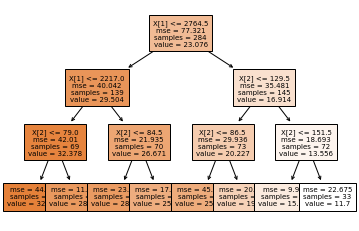

In [30]:
tree.plot_tree(model, filled = 'True', fontsize = 7)

In [20]:
y_pred = model.predict(X_Test)
y_pred

array([19.2483871 , 32.89833333, 25.4452381 , 25.4452381 , 25.74545455,
       25.4452381 , 19.2483871 , 25.4452381 , 19.2483871 , 25.4452381 ,
       32.89833333, 11.7       , 11.7       , 32.89833333, 25.4452381 ,
       25.4452381 , 28.51071429, 19.2483871 , 25.74545455, 25.4452381 ,
       25.4452381 , 25.4452381 , 25.4452381 , 28.51071429, 19.2483871 ,
       15.12564103, 19.2483871 , 19.2483871 , 25.4452381 , 32.89833333,
       19.2483871 , 19.2483871 , 25.74545455, 32.89833333, 15.12564103,
       32.89833333, 19.2483871 , 25.4452381 , 19.2483871 , 11.7       ,
       25.74545455, 32.89833333, 19.2483871 , 19.2483871 , 32.89833333,
       25.4452381 , 15.12564103, 32.89833333, 25.4452381 , 19.2483871 ,
       32.89833333, 28.91111111, 25.74545455, 11.7       , 11.7       ,
       19.2483871 , 11.7       , 32.89833333, 19.2483871 , 15.12564103,
       19.2483871 , 19.2483871 , 32.89833333, 19.2483871 , 19.2483871 ,
       25.4452381 , 32.89833333, 32.89833333, 32.89833333, 32.89

In [22]:
#Root Mean Square Error

np.sqrt(np.mean((np.array(y_Test) - y_pred) ** 2))

10.255870838812472

**We should consider those values which are lesser than the Root Mean Sqaure Error Value**